# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.


### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution


In [402]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [403]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [404]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

#### 1. What test is appropriate for this problem? Does CLT apply?

We may use both bootstrapping (permutation sampling) and frequentist statistics (two-sample proportion z-test) to solve this problem. CLT applies because there are 4870 resumes ID'd as either a black or white person.

In [406]:
combined = data[(data.race=='b') | (data.race=='w')]
combined.call.count()

4870

#### 2. What are the null and alternate hypotheses?
We are doing comparing two proportions where the proportion in question is call back rate. Our null hypothesis is that the black call back rate proportion, $p_b$, is the same as the white call back rate proportion, $p_w$. The alternative hypothesis is that the white call back rate proportion is greater than the black call back rate proportion.

H_0: $p_w$ = $p_b$

H_1: $p_w$ > $p_b$

$α$ = 0.05

In [407]:
# Race Specific data
w = data[data.race=='w']
b = data[data.race=='b']

# Number of calls per race
w_calls = sum(data[data.race=='w'].call)
b_calls = sum(data[data.race=='b'].call)
combined_calls = w_calls + b_calls

# Proportions
p_w = w_calls/len(w)
p_b = b_calls/len(b)
p_combined = combined_calls/len(combined)

print('white callback rate = %.3f   black callback rate = %.3f  combined callback rate = %.3f' % (p_w, p_b, p_combined))

white callback rate = 0.097   black callback rate = 0.064  combined callback rate = 0.080


#### 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [408]:
# Frequentist approach using two-sample z-test: Compute the p-value, standard error and z-statistic

# Standard Deviation
w_call_std = w.call.std()
b_call_std = b.call.std()
combined_call_std = combined.call.std()
# Mean
w_call_mean = w.call.mean()
b_call_mean = b.call.mean()
combined_call_mean = combined.call.mean()

# length of array
white_n = len(w.call)
black_n = len(b.call)
n = white_n + black_n

# Empirical difference in the callback proportion of the two samples
empirical_diff_prop = p_b - p_w

# Calculate Z-statistic
Z = 1.96
std_error = np.sqrt((p_b*(1-p_b)/black_n)+(p_w*(1-p_w)/white_n))
z_statistic = (empirical_diff_prop)/std_error
p_val = stats.norm.sf(np.abs(z_statistic)) # one-tail p-value

print('z-statistic = %.3f   p-value = %.8f   standard error = %.4f' % (z_statistic, p_val, std_error))

z-statistic = -4.116   p-value = 0.00001931   standard error = 0.0078


In [409]:
# Frequentist approach using two-sample z-test: Margin of Error 95% confidence interval
Z = 1.96
error_margin = Z*std_error
freq_ztest_CI_95 = [round(empirical_diff_prop - error_margin, 3), round(empirical_diff_prop + error_margin,3)]

#print('95% Confidence Interval: ' + str(freq_ztest_CI_95))
print('95% Confidence Interval: = ({:2.3f}, {:2.3f})  Margin of error = {:.4f}'.format(freq_ztest_CI_95[0], freq_ztest_CI_95[1], error_margin))

95% Confidence Interval: = (-0.047, -0.017)  Margin of error = 0.0153


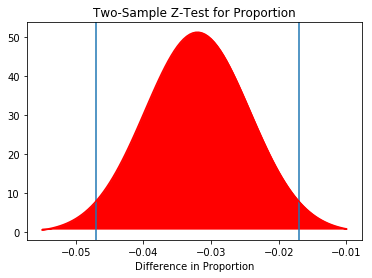

In [410]:
# Frequentist approach using two-sample z-test: Plot 95% confidence interval

# Parameters for plotting
x = np.linspace(-0.055, -0.01, 100)
pdf = stats.norm.pdf(x, empirical_diff_prop, std_error)

# Plotting
plt.axvline(x=freq_ztest_CI_95[0])
plt.axvline(x=freq_ztest_CI_95[1])
plt.plot(x, pdf, color='red') 
plt.fill_between(x, pdf, 1, color='red')

# Labels
plt.xlabel('Difference in Proportion')
plt.title('Two-Sample Z-Test for Proportion')
plt.show()

In [411]:
# Perform a two-sample bootstrap hypothesis test

def get_prop_diff(data1, data2):
    """Generate a proportion difference from two data sets."""
    p1 = np.sum(data1)/len(data1)
    p2 = np.sum(data2)/len(data2)
    
    return p1-p2

def get_permutation_replicate(data1, data2, func, size=1):
    """Generate a permutation replicates from two data sets."""
    
    permutation_replicates = np.empty(size)
    data = np.concatenate((data1, data2))
    # Concatenate the data sets: data    
    for i in range(size):
        # Permute the concatenated array: permuted_data
        permutation_samples = np.random.permutation(data)

        # Split the permuted array into two: perm_sample_1, perm_sample_2
        perm_sample_1 = permutation_samples[:len(data1)]
        perm_sample_2 = permutation_samples[len(data1):]
        permutation_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return permutation_replicates


# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates = get_permutation_replicate(b.call, w.call, get_prop_diff, size=10000)

# Compute and print p-value: p
p_val = np.sum(bs_replicates <= empirical_diff_prop) / len(bs_replicates)
print('p-value = %.10f' % p_val)

p-value = 0.0000000000


In [412]:
# Bootstrap approach: 95% confidence interval
# Bootstrapping allows us to take percentiles of the bootstrap replicates to get the confidence interval
bootstrap_CI_95 = np.percentile(bs_replicates,[2.5,97.5])
bootstrap_CI_95 = [round(bootstrap_CI_95[0],3), round(bootstrap_CI_95[1],3)]
print('95% Confidence Interval: ' + str(bootstrap_CI_95))

95% Confidence Interval: [-0.015, 0.016]


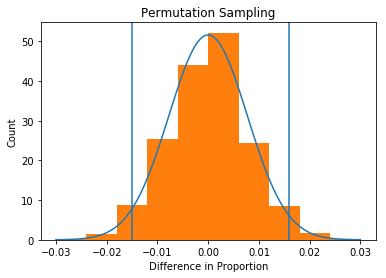

In [413]:
# Bootstrap approach: Plot distribution of the bootstrap replicates, and also plot the frequentist
# Parameters for plotting
x = np.linspace(-0.03, 0.03, 100)
call_back_rate_mean = np.mean(bs_replicates)
call_back_rate_std = np.std(bs_replicates)
pdf = stats.norm.pdf(x, call_back_rate_mean, call_back_rate_std)

# Plot
plt.plot(x, pdf) 
plt.hist(bs_replicates, range = [-0.03, 0.03], normed=True) # set normed true because we are comparing to a pdf
plt.axvline(x=bootstrap_CI_95[0])
plt.axvline(x=bootstrap_CI_95[1])

# Axis Labels
plt.ylabel('Count')
plt.xlabel('Difference in Proportion')
plt.title('Permutation Sampling')
plt.show()

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

#### 4. Write a story describing the statistical significance in the context or the original problem.

In this study, we determine if there is statistically significant racial discrimination in the job market against "black-sounding" names, e.g. Tyronne. We used bootstrapping (permutation sampling) and frequentist statistics (two-sample proportion z-test) to solve the problem. Since this problem concerns comparing two proportions, we use callback rate proportion as our test statistic. Bootstapping showed a p-value of 0.0 with a 95% confidence interval of -0.016 to 0.015, while the z-test showed a p-value of 0.00001931 with a 95% confidence interval of -0.047 to -0.017. Both approaches favor the alternate hypothesis that "white-sounding" names have a higher call-back rate than "black-sounding" names. Racial discrimination in the job market is indeed still an issue for Black Americans.

#### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The analysis does not mean race/name is the most important factor in callback success because we have not yet studied other features. We could use a parametric machine learning algorithm, such as multiple linear regression or logistic regression, to determine the importance of other features based on the feature weights. From inspection, other features that may be important include: age, years of experience, sex, education, etc.